In [1]:
%matplotlib inline
from IPython.display import Image
import os
import numpy as np
import matplotlib.pyplot as plt

import flopy

#Set the paths
datapth = os.path.join('..', 'test-swr', 'swr009')

In [2]:
nrows = 11
ncols = 11
i0 = 10 * nrows
i1 = i0 + nrows

In [3]:
sobj = flopy.utils.SwrStage(os.path.join(datapth, 'ss2D.stg'))
s = sobj.get_data(idx=0)['stage'][i0:i1]

sobj0 = flopy.utils.SwrStage(os.path.join(datapth, '.cmp', 'ss2D.stg.cmp'))
s0 = sobj0.get_data(idx=0)['stage'][i0:i1]

In [4]:
x = np.cumsum(np.ones(nrows, dtype=np.float)*500.) - 500./2.
slope = (1.05 - 0.95) / 500.
z = 1.05 - slope * (x - 500./2.)

#### Plot the data from the binary SWR Process stage file

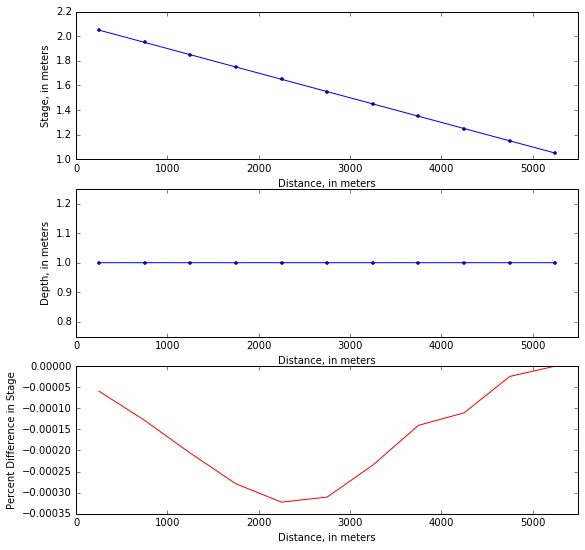

In [5]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(3, 1, 1)
ax.set_xlim(0,nrows*500.)
ax.plot(x, s, color='blue')
ax.plot(x, s0, color='blue', lw=0, marker='o', ms=3)
ax.set_ylabel('Stage, in meters')
ax.set_xlabel('Distance, in meters')

ax = fig.add_subplot(3, 1, 2)
ax.set_ylim(0.75,1.25)
ax.set_xlim(0,nrows*500.)
ax.plot(x, s-z, color='blue')
ax.plot(x, s0-z, color='blue', lw=0, marker='o', ms=3)
ax.set_ylabel('Depth, in meters')
ax.set_xlabel('Distance, in meters')

ax = fig.add_subplot(3, 1, 3)
ax.set_xlim(0,nrows*500.)
ax.plot(x, 100.*(s-s0)/s0, color='red')
ax.set_ylabel('Percent Difference in Stage')
ax.set_xlabel('Distance, in meters')

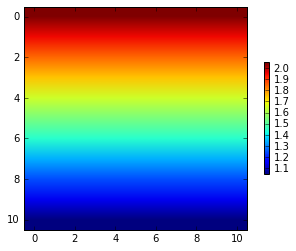

In [6]:
sa = sobj.get_data(idx=0)['stage'].reshape(nrows, ncols).T
cm = plt.imshow(sa)
plt.colorbar(cm, shrink=0.5)